In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split




In [40]:
DF = pd.read_csv('healthcare-dataset-stroke-data.csv')
DF.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [43]:
DF.shape

(5110, 12)

In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
DF.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
print(DF['gender'].unique())
print(DF['work_type'].unique())
print(DF['Residence_type'].unique())
print(DF['smoking_status'].unique())
print(DF['ever_married'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


In [27]:
DF.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
DF['bmi'].isnull().mean()

np.float64(0.03933463796477495)

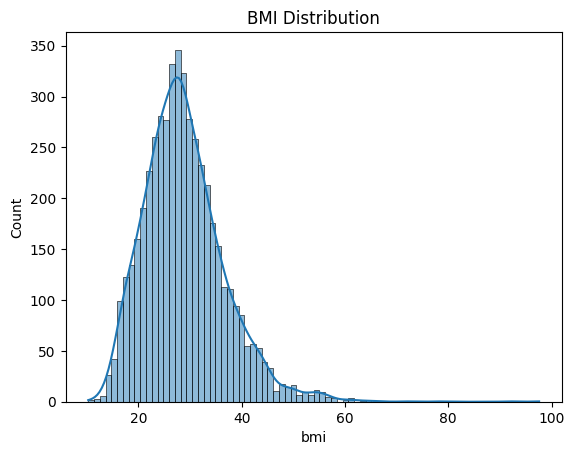

In [29]:
sns.histplot(DF['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

In [30]:
DF['bmi'].fillna(DF['bmi'].mean(), inplace=True)


C:\Users\hal3r\AppData\Local\Temp\ipykernel_1072\3457363685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['bmi'].fillna(DF['bmi'].mean(), inplace=True)


<Axes: >

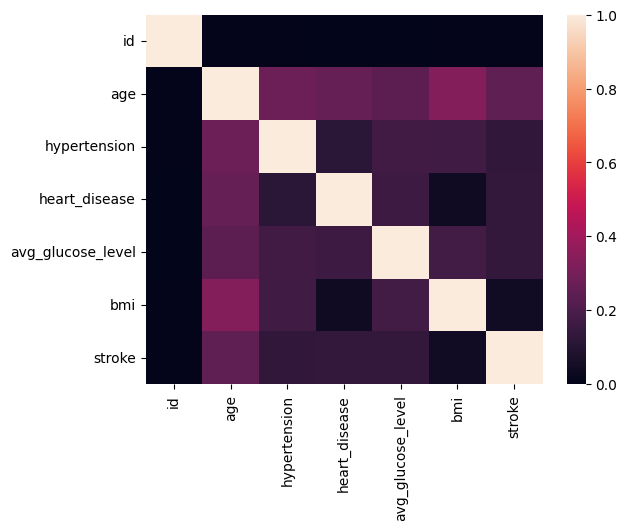

In [44]:
corr = DF.select_dtypes('number').corr()
sns.heatmap(corr)

In [45]:
DF.drop(columns = ['id'],inplace = True)

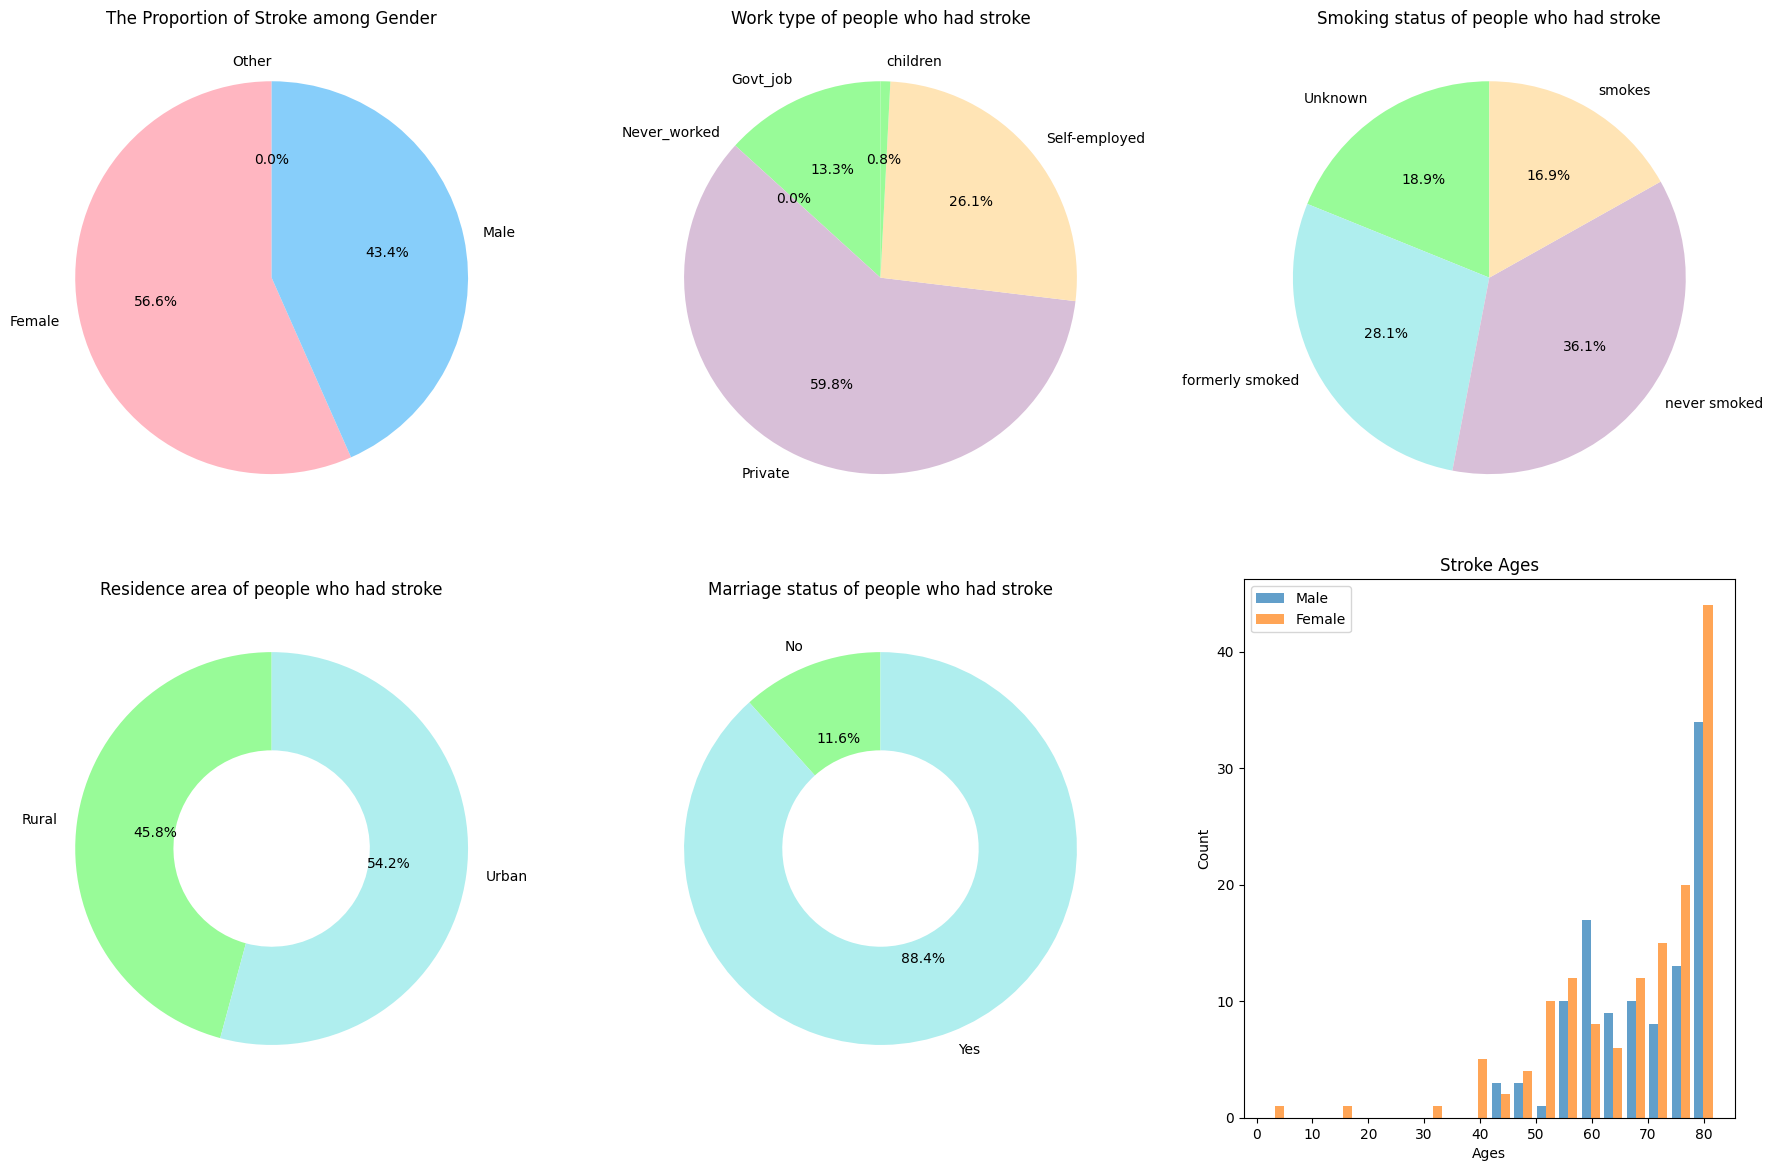

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping
gender = DF.groupby('gender')['stroke'].sum()
job = DF.groupby('work_type')['stroke'].sum()
smoke = DF.groupby('smoking_status')['stroke'].sum()
Residence = DF.groupby('Residence_type')['stroke'].sum()
Married = DF.groupby('ever_married')['stroke'].sum()

# DataFrames
DF_gender = pd.DataFrame({'labels': gender.index, 'values': gender.values})
DF_job = pd.DataFrame({'labels': job.index, 'values': job.values})
DF_smoke = pd.DataFrame({'labels': smoke.index, 'values': smoke.values})
DF_Residence = pd.DataFrame({'labels': Residence.index, 'values': Residence.values})
DF_Married = pd.DataFrame({'labels': Married.index, 'values': Married.values})

# Colors
colors1 = ['lightpink', 'lightskyblue']
colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']

# Stroke Ages
stroke = DF[DF['stroke'] == 1].reset_index()
male_age = stroke[stroke['gender'] == 'Male']['age']
female_age = stroke[stroke['gender'] == 'Female']['age']

# Subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

# Gender
axs[0].pie(DF_gender['values'], labels=DF_gender['labels'], colors=colors1, 
           autopct='%1.1f%%', startangle=90)
axs[0].set_title('The Proportion of Stroke among Gender')

# Job
axs[1].pie(DF_job['values'], labels=DF_job['labels'], colors=colors2, 
           autopct='%1.1f%%', startangle=90)
axs[1].set_title('Work type of people who had stroke')

# Smoking Status
axs[2].pie(DF_smoke['values'], labels=DF_smoke['labels'], colors=colors2, 
           autopct='%1.1f%%', startangle=90)
axs[2].set_title('Smoking status of people who had stroke')

# Residence (Donut)
axs[3].pie(DF_Residence['values'], labels=DF_Residence['labels'], colors=colors2, 
           autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.5})
axs[3].set_title('Residence area of people who had stroke')

# Marriage Status (Donut)
axs[4].pie(DF_Married['values'], labels=DF_Married['labels'], colors=colors2, 
           autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.5})
axs[4].set_title('Marriage status of people who had stroke')

# Stroke Ages Histogram
axs[5].hist([male_age, female_age], bins=20, label=['Male', 'Female'], alpha=0.7)
axs[5].set_title('Stroke Ages')
axs[5].set_xlabel('Ages')
axs[5].set_ylabel('Count')
axs[5].legend()

# Layout
plt.tight_layout()
plt.show()


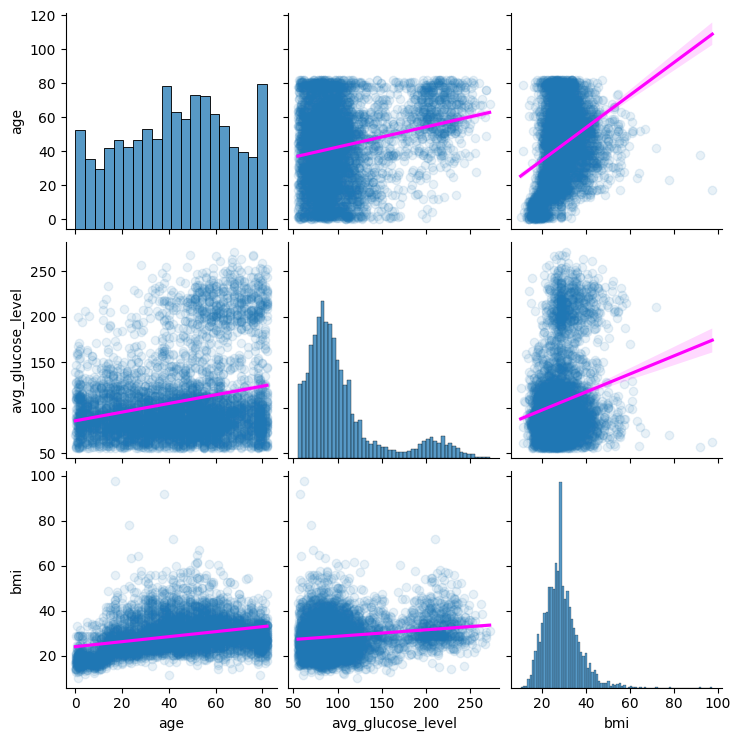

In [39]:
features_num = ['age', 'avg_glucose_level','bmi']
sns.pairplot(DF[features_num], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

Handling Categorical Columns

In [33]:
DF['ever_married'] = [ 0 if i !='Yes' else 1 for i in DF['ever_married'] ]
DF['gender'] = [0 if i != 'Female' else 1 for i in DF['gender']]
DF.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
#Applying one hot encoding:
DF = pd.get_dummies(DF, columns=['work_type', 'Residence_type', 'smoking_status'], dtype=int)

In [35]:
DF

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,1,61.0,0,0,1,202.21,28.893237,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,0,80.0,0,1,1,105.92,32.500000,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,1,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,1,79.0,1,0,1,174.12,24.000000,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,83.75,28.893237,0,0,0,1,0,0,0,1,0,0,1,0
5106,44873,1,81.0,0,0,1,125.20,40.000000,0,0,0,0,1,0,0,1,0,0,1,0
5107,19723,1,35.0,0,0,1,82.99,30.600000,0,0,0,0,1,0,1,0,0,0,1,0
5108,37544,0,51.0,0,0,1,166.29,25.600000,0,0,0,1,0,0,1,0,0,1,0,0


In [17]:
DF['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

In [19]:
X = DF.drop(['stroke'], axis = 1)
y = DF['stroke']

In [21]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3423, 19), (1687, 19))